In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
from  sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import  make_pipeline,Pipeline
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import f_regression
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.ensemble import GradientBoostingRegressor





In [2]:
df=pd.read_csv(r"C:\Users\hp\Desktop\house_sale.csv")

In [3]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
def data_preprocessor(X,y):
        """Function to Prepocess the data """
        numeric_transformer = Pipeline(
                steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
            )

        categorical_transformer = OneHotEncoder(handle_unknown="ignore")
        preprocessor = ColumnTransformer(
                transformers=[
                    ("numeric", numeric_transformer, X.select_dtypes(np.number).columns.tolist()),
                    ("category", categorical_transformer,X.select_dtypes("object").columns.tolist()),
                ],remainder="passthrough"
            )
        return preprocessor
def result_evaluator_regressor(model,xtest,ytest):
         ypred_model=model.predict(xtest)
         r2score=r2_score(ytest,ypred_model)
         mse=mean_absolute_error(ytest,ypred_model)
         return (round(r2score,4))*100,mse

<AxesSubplot:ylabel='SalePrice'>

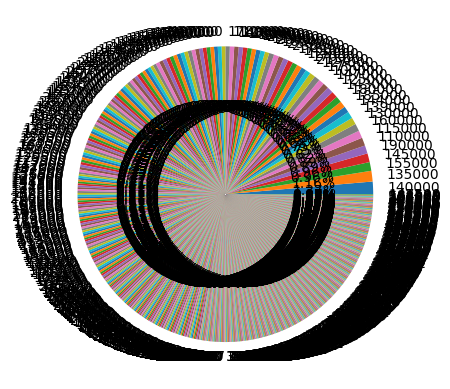

In [5]:


from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
X=df.drop(columns=["SalePrice"])
y=df["SalePrice"]

In [7]:

preprocessor=data_preprocessor(X,y)

In [ ]:
df["Outcome"].value_counts().plot(kind="pie",autopct='%.2f%%')

In [8]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', RandomOverSampler())
   ])

In [103]:
def svm_Regressor(X,y,start,end,parms,sampling="SMOTE"):

        preprocessor=data_preprocessor(X,y)
        Listing=[]
        temp=1
        pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversampler', RandomOverSampler())
   ])
        # st.write("In main FUnction ")
        xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=45)


        parms={
                    "classifier__weights":["uniform",],
                    "classifier__algorithm":["auto", ],
                    'classifier__n_neighbors':[2,3,],}


        for i in range(start,end):
        # ****************Feature Seclortot**********************************************
                feature_selector = Pipeline(
                    steps=[("preprocessor", preprocessor),
                    ("feature", SelectKBest(f_regression,k=i))])
                feature_selector.fit(xtrain,ytrain)
        # ****************Model Seclortot**********************************************
                model_selector = Pipeline(
                    steps=[("preprocessor", preprocessor),
                    ("feature", SelectKBest(f_regression,k=i)),
                    ("classifier",  KNeighborsRegressor())]
                )
                model_selector.fit(xtrain,ytrain)
        # *********************************Hyper Parametet***********************************
                grid=GridSearchCV(model_selector,parms,cv=4,n_jobs=-1,verbose=3)
                grid.fit(xtrain,ytrain)
                feature=grid.best_params_
                model=grid.best_estimator_

                
                result_parameter,mae_parameter=result_evaluator_regressor(model,xtest,ytest)
               
                # print(f"R2 score with best parameter{result_parameter}")
                # print(f"Mean Absoulte Error with best parameter{mae_parameter}")
           

        #****************************Result Generation ******************************
                result,mae=result_evaluator_regressor(model_selector,xtest,ytest)
                

                # print(f"Accuracy without  Best parameter{result}")
                # print(f"Mean Absoulte Error without  best parameter{mae}")
            
        #*********************************Working on features****************************
                xopt=feature_selector.get_feature_names_out()
                feature_selection=[]
                for x in xopt:
                    feature_selection.append(x.split("__")[1])
                # st.write(feature_selection)
                # print("The feature Selection are as follow-:")
                # print(feature_selection)
                # print(feature)
                # print(feature_selection)
                if temp!=1:
                        # print("printing ",resultdf)
                        print(resultdf["result_parameter"].max())
                        if round(result_parameter)>(round(resultdf["result_parameter"]).max()):
                                print("Model Downloaded",round(result_parameter))
                                download_model=model
                                print(feature_selection)
                else:
                        Listing.append({
                        "i":i,
                        "result":result,
                        "mae":mae,
                        "result_parameter":result_parameter,
                        "mae_parameter":mae_parameter,
                        #     "Error_model":result_model,
                        "columns":feature_selection,
                        "parameter":feature,
                        "sampling":sampling,
                        })
                        resultdf=pd.DataFrame(Listing)
                        print(result_parameter)
                        temp=2
                # print(result)
        
        

        return Listing,model,download_model
parms={}
listing,model,download_model=svm_Regressor(X,y,1,10,parms)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
66.97999999999999
Fitting 4 folds for each of 2 candidates, totalling 8 fits
66.97999999999999
Model Downloaded 75
['OverallQual', 'GrLivArea']
Fitting 4 folds for each of 2 candidates, totalling 8 fits
66.97999999999999
Model Downloaded 81
['OverallQual', 'GrLivArea', 'GarageCars']
Fitting 4 folds for each of 2 candidates, totalling 8 fits
66.97999999999999
Model Downloaded 82
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']
Fitting 4 folds for each of 2 candidates, totalling 8 fits
66.97999999999999
Model Downloaded 83
['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea']
Fitting 4 folds for each of 2 candidates, totalling 8 fits
66.97999999999999
Model Downloaded 85
['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'ExterQual_TA']
Fitting 4 folds for each of 2 candidates, totalling 8 fits
66.97999999999999
Model Downloaded 84
['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivAre

In [111]:
import math.floor

ModuleNotFoundError: No module named 'math.floor'; 'math' is not a package

In [117]:
def svm_Regressor(X,y,start,end,parms,sampling="SMOTE"):

        preprocessor=data_preprocessor(X,y)
        Listing=[]
    
        res2=0
        # st.write("In main FUnction ")
        xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=45)


        parms={
                    "classifier__weights":["uniform",],
                    "classifier__algorithm":["auto", ],
                    'classifier__n_neighbors':[2,3,],}


        for i in range(start,end):
        # ****************Feature Seclortot**********************************************
                feature_selector = Pipeline(
                    steps=[("preprocessor", preprocessor),
                    ("feature", SelectKBest(f_regression,k=i))])
                feature_selector.fit(xtrain,ytrain)
        # ****************Model Seclortot**********************************************
                model_selector = Pipeline(
                    steps=[("preprocessor", preprocessor),
                    ("feature", SelectKBest(f_regression,k=i)),
                    ("classifier",  KNeighborsRegressor())]
                )
                model_selector.fit(xtrain,ytrain)
        # *********************************Hyper Parametet***********************************
                grid=GridSearchCV(model_selector,parms,cv=4,n_jobs=-1,verbose=3)
                grid.fit(xtrain,ytrain)
                feature=grid.best_params_
                model=grid.best_estimator_
                saved_model=model
                
                result_parameter,mae_parameter=result_evaluator_regressor(model,xtest,ytest)
       
                # print(f"R2 score with best parameter{result_parameter}")
                # print(f"Mean Absoulte Error with best parameter{mae_parameter}")
           

        #****************************Result Generation ******************************
                result,mae=result_evaluator_regressor(model_selector,xtest,ytest)
                

                # print(f"Accuracy without  Best parameter{result}")
                # print(f"Mean Absoulte Error without  best parameter{mae}")
            
        #*********************************Working on features****************************
                xopt=feature_selector.get_feature_names_out()
                feature_selection=[]
                for x in xopt:
                    feature_selection.append(x.split("__")[1])
                # st.write(feature_selection)
                # print("The feature Selection are as follow-:")
                # print(feature_selection)
                # print(feature)
                # print(feature_selection)
                Listing.append({
                       "i":i,
                        "result":result,
                        "mae":mae,
                        "result_parameter":result_parameter,
                        "mae_parameter":mae_parameter,
                        #     "Error_model":result_model,
                        "columns":feature_selection,
                        "parameter":feature,
                        "sampling":sampling,
                        })
                # col=feature_selection.copy
                
                
                print("before",(math.floor(res2),math.floor(result_parameter)))
                if math.floor(res2)<math.floor(result_parameter):
                        download_model=model
                        res2=result_parameter
                        print(i)
                        print(("after",math.floor(res2),math.floor(result_parameter)))
                # print(result)
        
        

        return Listing,model,download_model
parms={}
listing,model,download_model=svm_Regressor(X,y,1,10,parms)

Fitting 4 folds for each of 2 candidates, totalling 8 fits
66.97999999999999
before (90, 66)
Fitting 4 folds for each of 2 candidates, totalling 8 fits
75.01
before (90, 75)
Fitting 4 folds for each of 2 candidates, totalling 8 fits
80.93
before (90, 80)
Fitting 4 folds for each of 2 candidates, totalling 8 fits
81.91000000000001
before (90, 81)
Fitting 4 folds for each of 2 candidates, totalling 8 fits
82.78999999999999
before (90, 82)
Fitting 4 folds for each of 2 candidates, totalling 8 fits
84.54
before (90, 84)
Fitting 4 folds for each of 2 candidates, totalling 8 fits
84.15
before (90, 84)
Fitting 4 folds for each of 2 candidates, totalling 8 fits
83.89
before (90, 83)
Fitting 4 folds for each of 2 candidates, totalling 8 fits
85.03
before (90, 85)


UnboundLocalError: local variable 'download_model' referenced before assignment

In [118]:
import random


In [ ]:
def model_saving(remaining_url,name):
    base_url="media/"
    full_url=base_url+remaining_url
    id_generator=random.randint(1000,9999)
    joblib.dump(model, open(full_url, 'wb'))
    result=TrainedModel(username=name,location=full_url,modelname=remaining_url,uniqueid=id_generator)
    result.save()

In [98]:
download_model.r2_score(y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Unnamed: 0', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'Tot...
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('feature',
                 SelectKBest(k=9,
                             score_func=<function f_regression at 0x000001FDF78ED160>)),
                ('classifier', KNeighborsRegressor(n_neighbors=3))])

In [70]:
result=pd.DataFrame(listing)
result

,i,result,mae,result_parameter,mae_parameter,columns,parameter,sampling
0,1,64.49,33952.017123,66.98,32634.061644,[OverallQual],"{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
1,2,76.51,27748.647260,75.01,28807.133562,"[OverallQual, GrLivArea]","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
2,3,83.77,24438.656164,80.93,26053.334475,"[OverallQual, GrLivArea, GarageCars]","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
3,4,83.75,23090.453425,81.91,23671.324201,"[OverallQual, GrLivArea, GarageCars, GarageArea]","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
4,5,83.47,22306.854110,82.79,22838.162100,"[OverallQual, TotalBsmtSF, GrLivArea, GarageCa...","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
5,6,84.62,21720.073288,84.54,22340.384703,"[OverallQual, TotalBsmtSF, GrLivArea, GarageCa...","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
6,7,84.90,21473.065753,84.15,22514.291096,"[OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea...","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
7,8,86.30,20757.035616,83.89,22230.344749,"[OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea...","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
8,9,86.39,21050.853425,85.03,21533.465753,"[OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea...","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE


In [96]:
z=result.sort_values(by=["i","result_parameter",],ascending=[False,True])
z

,i,result,mae,result_parameter,mae_parameter,columns,parameter,sampling
8,9,86.39,21050.853425,85.03,21533.465753,"[OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea...","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
7,8,86.30,20757.035616,83.89,22230.344749,"[OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea...","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
6,7,84.90,21473.065753,84.15,22514.291096,"[OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea...","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
5,6,84.62,21720.073288,84.54,22340.384703,"[OverallQual, TotalBsmtSF, GrLivArea, GarageCa...","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
4,5,83.47,22306.854110,82.79,22838.162100,"[OverallQual, TotalBsmtSF, GrLivArea, GarageCa...","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
3,4,83.75,23090.453425,81.91,23671.324201,"[OverallQual, GrLivArea, GarageCars, GarageArea]","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
2,3,83.77,24438.656164,80.93,26053.334475,"[OverallQual, GrLivArea, GarageCars]","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
1,2,76.51,27748.647260,75.01,28807.133562,"[OverallQual, GrLivArea]","{'classifier__algorithm': 'auto', 'classifier_...",SMOTE
0,1,64.49,33952.017123,66.98,32634.061644,[OverallQual],"{'classifier__algorithm': 'auto', 'classifier_...",SMOTE


In [94]:
print(z)
print(type(z))
print(z["parameter"])

i                                                                   9
result                                                          86.39
mae                                                      33952.017123
result_parameter                                                85.03
mae_parameter                                            32634.061644
columns             [OverallQual, TotalBsmtSF, GrLivArea, GarageCa...
sampling                                                        SMOTE
dtype: object
<class 'pandas.core.series.Series'>


KeyError: 'parameter'

In [1]:
import time

In [7]:
import datetime

now = datetime.datetime.now().date()
print(now)

2023-03-27


In [ ]:
import datetime

now = datetime.datetime.now().date()
print(now)

In [8]:
import datetime

now = datetime.datetime.now()
time_string = now.strftime('%H:%M:%S')
print(time_string)


12:00:57


In [41]:
from bisect import bisect_left

In [58]:
res=round(z["result_parameter"])
print(res)

8    85.0
7    85.0
6    85.0
5    84.0
4    84.0
3    81.0
2    80.0
1    74.0
0    68.0
Name: result_parameter, dtype: float64


In [53]:
bisect_left(round(z["result_parameter"],2), 90)

9

In [23]:
a=result["result_parameter"].sort_values(ascending=False)

In [25]:
b=list(a)

In [28]:
b

[85.04,
 84.85000000000001,
 84.67,
 84.46000000000001,
 84.05,
 80.97,
 79.92,
 74.09,
 68.30000000000001]